In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import category_encoders as ce

import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix ,classification_report
from sklearn import metrics

ModuleNotFoundError: No module named 'category_encoders'

In [3]:
DF = pd.read_excel('compactiv.xlsx')

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [7]:
DF.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [21]:
DF.describe(include="all").transpose()

count unique            top  freq         mean      std   min  \
lread     8192    NaN            NaN   NaN      19.5597  53.3538     0   
lwrite    8192    NaN            NaN   NaN      13.1062  29.8917     0   
scall     8192    NaN            NaN   NaN      2306.32  1633.62   109   
sread     8192    NaN            NaN   NaN       210.48   198.98     6   
swrite    8192    NaN            NaN   NaN      150.058  160.479     7   
fork      8192    NaN            NaN   NaN      1.88455  2.47949     0   
exec      8192    NaN            NaN   NaN        2.792  5.21246     0   
rchar     8088    NaN            NaN   NaN       197386   239837   278   
wchar     8177    NaN            NaN   NaN        95903   140842  1498   
pgout     8192    NaN            NaN   NaN      2.28532  5.30704     0   
ppgout    8192    NaN            NaN   NaN      5.97723  15.2146     0   
pgfree    8192    NaN            NaN   NaN      11.9197  32.3635     0   
pgscan    8192    NaN            NaN   NaN      21.5268  71.1413     0   
atch      8192    NaN            NaN   NaN       1.1275  5.70835     0   
pgin      8192    NaN            NaN   NaN      8.27796   13.875     0   
ppgin     8192    NaN            NaN   NaN      12.3886  22.2813     0   
pflt      8192    NaN            NaN   NaN      109.794  114.419     0   
vflt      8192    NaN            NaN   NaN      185.316  191.001   0.2   
runqsz    8192      2  Not_CPU_Bound  4331          NaN      NaN   NaN   
freemem   8192    NaN            NaN   NaN      1763.46   2482.1    55   
freeswap  8192    NaN            NaN   NaN  1.32813e+06   422019     2   
usr       8192    NaN            NaN   NaN      83.9689  18.4019     0   

                  25%          50%          75%          max  
lread               2            7           20         1845  
lwrite              0            1           10          575  
scall            1012       2051.5      3317.25        12493  
sread              86          166          279         5318  
swrite             63          117          185         5456  
fork              0.4          0.8          2.2        20.12  
exec              0.2          1.2          2.8        59.56  
rchar         34091.5       125474       267829  2.52665e+06  
wchar           22916        46619       106101  1.80162e+06  
pgout               0            0          2.4        81.44  
ppgout              0            0          4.2        184.2  
pgfree              0            0            5          523  
pgscan              0            0            0         1237  
atch                0            0          0.6       211.58  
pgin              0.6          2.8        9.765        141.2  
ppgin             0.6          3.8         13.8       292.61  
pflt               25         63.8        159.6        899.8  
vflt             45.4        120.4        251.8         1365  
runqsz            NaN          NaN          NaN          NaN  
freemem           231          579      2002.25        12027  
freeswap  1.04262e+06  1.28929e+06  1.73038e+06  2.24319e+06  
usr                81           89           94           99

In [9]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

In [10]:
print("Number of Duplicates ",DF.duplicated().sum())

Number of Duplicates  0


In [13]:
DF.shape

(8192, 22)

In [14]:
(DF == 0).all()

lread       False
lwrite      False
scall       False
sread       False
swrite      False
fork        False
exec        False
rchar       False
wchar       False
pgout       False
ppgout      False
pgfree      False
pgscan      False
atch        False
pgin        False
ppgin       False
pflt        False
vflt        False
runqsz      False
freemem     False
freeswap    False
usr         False
dtype: bool

In [15]:
DF.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

Text(0.5, 1.0, 'sread Distribution')

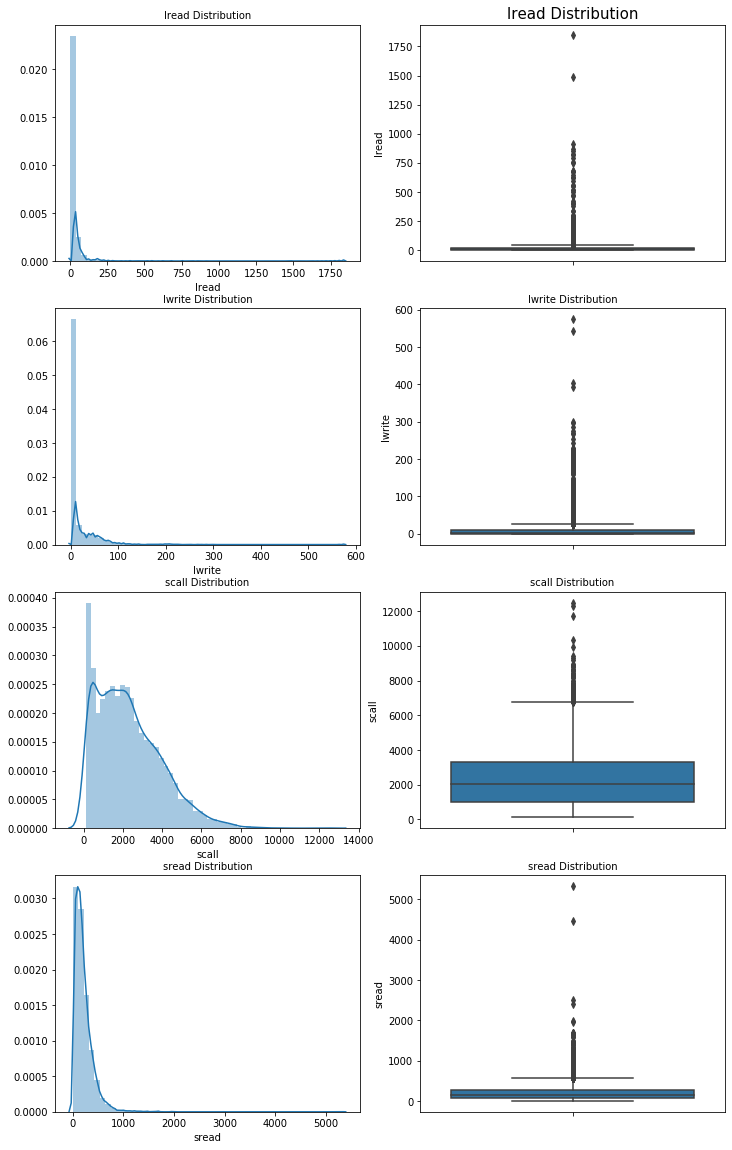

In [22]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)

a = sns.distplot(DF['lread'] , ax=axes[0][0])
a.set_title("lread Distribution",fontsize=10)
a = sns.boxplot(DF['lread'] , orient = "v" , ax=axes[0][1])
a.set_title("lread Distribution",fontsize=15)

a = sns.distplot(DF['lwrite'] , ax=axes[1][0])
a.set_title("lwrite Distribution",fontsize=10)

a = sns.boxplot(DF['lwrite'] , orient = "v" , ax=axes[1][1])
a.set_title("lwrite Distribution",fontsize=10)

a = sns.distplot(DF['scall'] , ax=axes[2][0])
a.set_title("scall Distribution",fontsize=10)

a = sns.boxplot(DF['scall'] , orient = "v" , ax=axes[2][1])
a.set_title("scall Distribution",fontsize=10)

a = sns.distplot(DF['sread'] , ax=axes[3][0])
a.set_title("sread Distribution",fontsize=10)

a = sns.boxplot(DF['sread'] , orient = "v" , ax=axes[3][1])
a.set_title("sread Distribution",fontsize=10)

Text(0.5, 1.0, 'rchar Distribution')

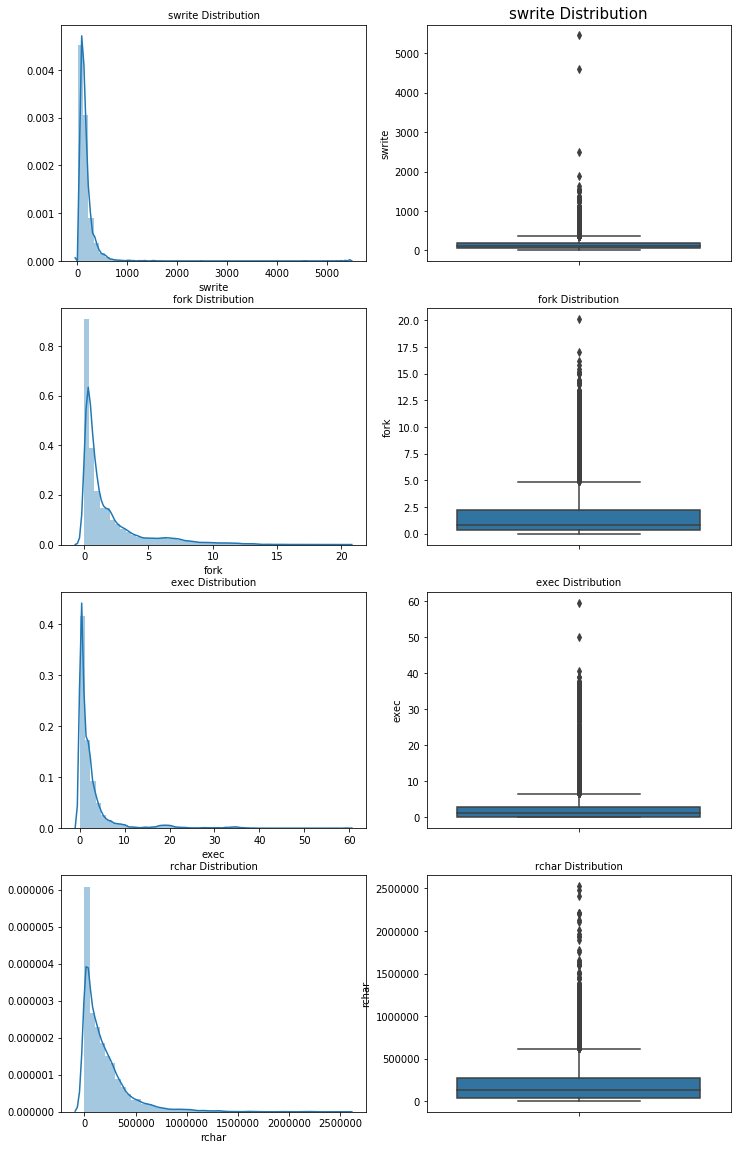

In [23]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(DF['swrite'] , ax=axes[0][0])
a.set_title("swrite Distribution",fontsize=10)

a = sns.boxplot(DF['swrite'] , orient = "v" , ax=axes[0][1])
a.set_title("swrite Distribution",fontsize=15)

a = sns.distplot(DF['fork'] , ax=axes[1][0])
a.set_title("fork Distribution",fontsize=10)

a = sns.boxplot(DF['fork'] , orient = "v" , ax=axes[1][1])
a.set_title("fork Distribution",fontsize=10)

a = sns.distplot(DF['exec'] , ax=axes[2][0])
a.set_title("exec Distribution",fontsize=10)

a = sns.boxplot(DF['exec'] , orient = "v" , ax=axes[2][1])
a.set_title("exec Distribution",fontsize=10)

a = sns.distplot(DF['rchar'] , ax=axes[3][0])
a.set_title("rchar Distribution",fontsize=10)

a = sns.boxplot(DF['rchar'] , orient = "v" , ax=axes[3][1])
a.set_title("rchar Distribution",fontsize=10)

Text(0.5, 1.0, 'pgfree Distribution')

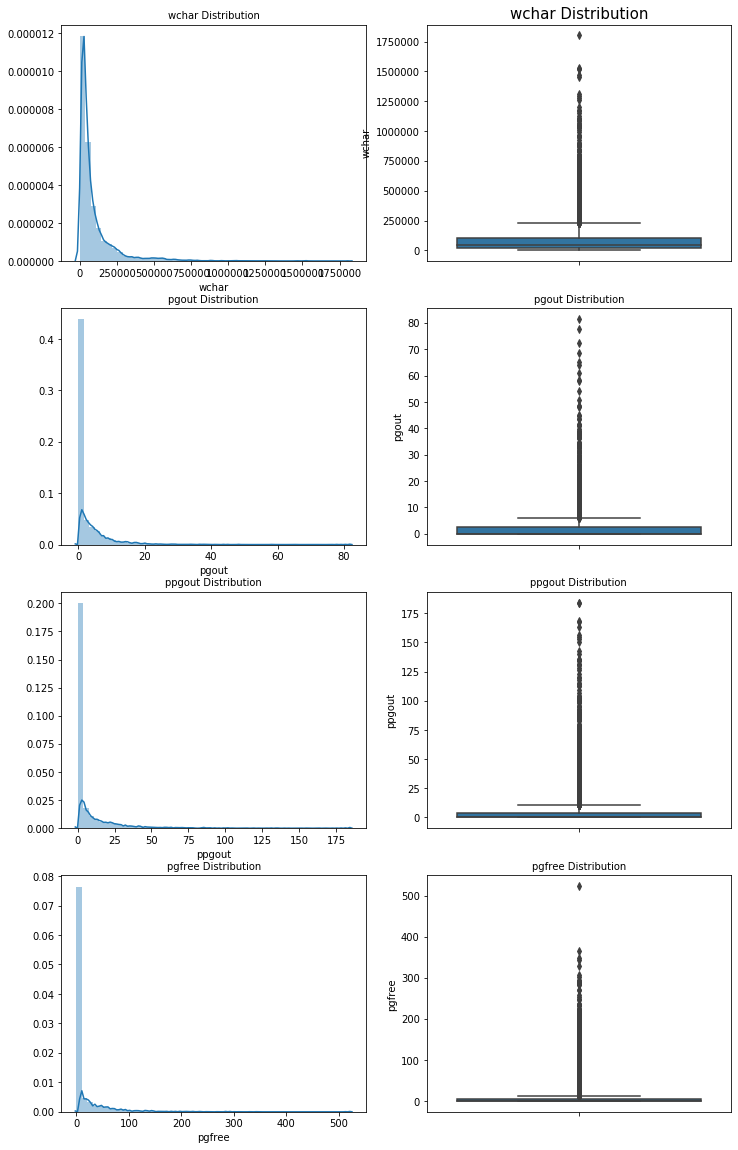

In [25]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12, 20)
a = sns.distplot(DF['wchar'] , ax=axes[0][0])
a.set_title("wchar Distribution",fontsize=10)

a = sns.boxplot(DF['wchar'] , orient = "v" , ax=axes[0][1])
a.set_title("wchar Distribution",fontsize=15)

a = sns.distplot(DF['pgout'] , ax=axes[1][0])
a.set_title("pgout Distribution",fontsize=10)

a = sns.boxplot(DF['pgout'] , orient = "v" , ax=axes[1][1])
a.set_title("pgout Distribution",fontsize=10)

a = sns.distplot(DF['ppgout'] , ax=axes[2][0])
a.set_title("ppgout Distribution",fontsize=10)

a = sns.boxplot(DF['ppgout'] , orient = "v" , ax=axes[2][1])
a.set_title("ppgout Distribution",fontsize=10)

a = sns.distplot(DF['pgfree'] , ax=axes[3][0])
a.set_title("pgfree Distribution",fontsize=10)

a = sns.boxplot(DF['pgfree'] , orient = "v" , ax=axes[3][1])
a.set_title("pgfree Distribution",fontsize=10)

In [16]:
for column in DF.columns:
    if DF[column].dtype == 'object':
        print(column.upper(),': ',DF[column].nunique())
        print(DF[column].value_counts().sort_values())
        print('\n')

RUNQSZ :  2
CPU_Bound        3861
Not_CPU_Bound    4331
Name: runqsz, dtype: int64




C:\Users\unnathi u\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  


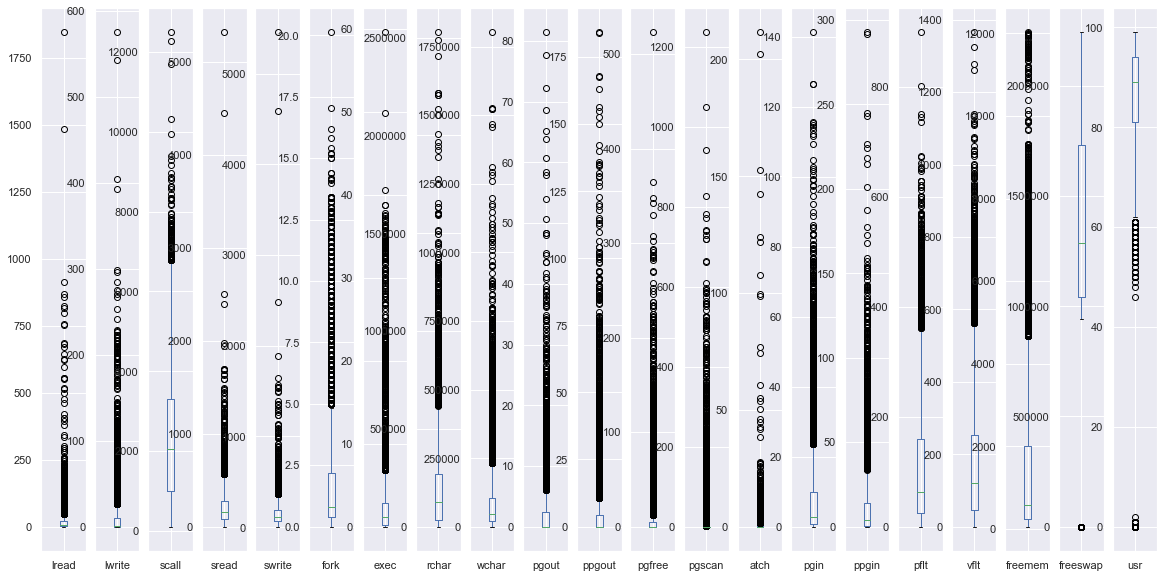

In [17]:
DF.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [18]:
from scipy import stats

numeric_cols = DF.select_dtypes(include=[np.number]).columns
numeric_cols=numeric_cols.delete(-1) #Removed the target column price 


z=np.abs(stats.zscore(DF[numeric_cols]))

listin= np.where(z>3)


outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )

the number of outliers are  5748


C:\Users\unnathi u\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':


In [19]:
print("replace outliers")

def outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Calculating maximum threshold
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)


DF[numeric_cols]=DF[numeric_cols].apply(outlier)
DF.describe()

replace outliers


lread       lwrite        scall        sread       swrite  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     15.353149    13.188843  2275.904932   198.302979   139.447357   
std      19.906684    23.476119  1548.314358   143.183957   100.748445   
min       0.000000     0.000000   109.000000     6.000000     7.000000   
25%       2.000000     0.000000  1012.000000    86.000000    63.000000   
50%       7.000000     1.000000  2051.500000   166.000000   117.000000   
75%      20.000000    10.000000  3317.250000   279.000000   185.000000   
max      68.000000    66.000000  6768.000000   568.000000   392.450000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.845552     2.355225  1.973857e+05  9.590299e+04     2.074583  ...   
std       2.256676     3.169813  2.398375e+05  1.408417e+05     3.734222  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max       7.400000    11.589000  2.526649e+06  1.801623e+06    11.420000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     14.134246    28.918743     0.904819     7.571747    11.162871   
std      27.264212    55.609014     1.734013    10.625813    16.131988   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max      70.290000   135.838500     5.000000    35.831500    53.780000   

              pflt         vflt      freemem      freeswap          usr  
count  8192.000000  8192.000000  8192.000000  8.192000e+03  8192.000000  
mean    105.431145   177.577158  1808.359558  1.362932e+06    83.968872  
std     101.035174   167.255745  2525.575412  3.437801e+05    18.401905  
min       0.000000     0.200000    55.000000  9.426000e+05     0.000000  
25%      25.000000    45.400000   231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000   579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000  2002.250000  1.730380e+06    94.000000  
max     361.280000   594.484500  7567.700000  2.243187e+06    99.000000  

[8 rows x 21 columns]

lread        AxesSubplot(0.125,0.125;0.031x0.755)
lwrite      AxesSubplot(0.1622,0.125;0.031x0.755)
scall       AxesSubplot(0.1994,0.125;0.031x0.755)
sread       AxesSubplot(0.2366,0.125;0.031x0.755)
swrite      AxesSubplot(0.2738,0.125;0.031x0.755)
fork         AxesSubplot(0.311,0.125;0.031x0.755)
exec        AxesSubplot(0.3482,0.125;0.031x0.755)
rchar       AxesSubplot(0.3854,0.125;0.031x0.755)
wchar       AxesSubplot(0.4226,0.125;0.031x0.755)
pgout       AxesSubplot(0.4598,0.125;0.031x0.755)
ppgout       AxesSubplot(0.497,0.125;0.031x0.755)
pgfree      AxesSubplot(0.5342,0.125;0.031x0.755)
pgscan      AxesSubplot(0.5714,0.125;0.031x0.755)
atch        AxesSubplot(0.6086,0.125;0.031x0.755)
pgin        AxesSubplot(0.6458,0.125;0.031x0.755)
ppgin        AxesSubplot(0.683,0.125;0.031x0.755)
pflt        AxesSubplot(0.7202,0.125;0.031x0.755)
vflt        AxesSubplot(0.7574,0.125;0.031x0.755)
freemem     AxesSubplot(0.7946,0.125;0.031x0.755)
freeswap    AxesSubplot(0.8318,0.125;0.031x0.755)


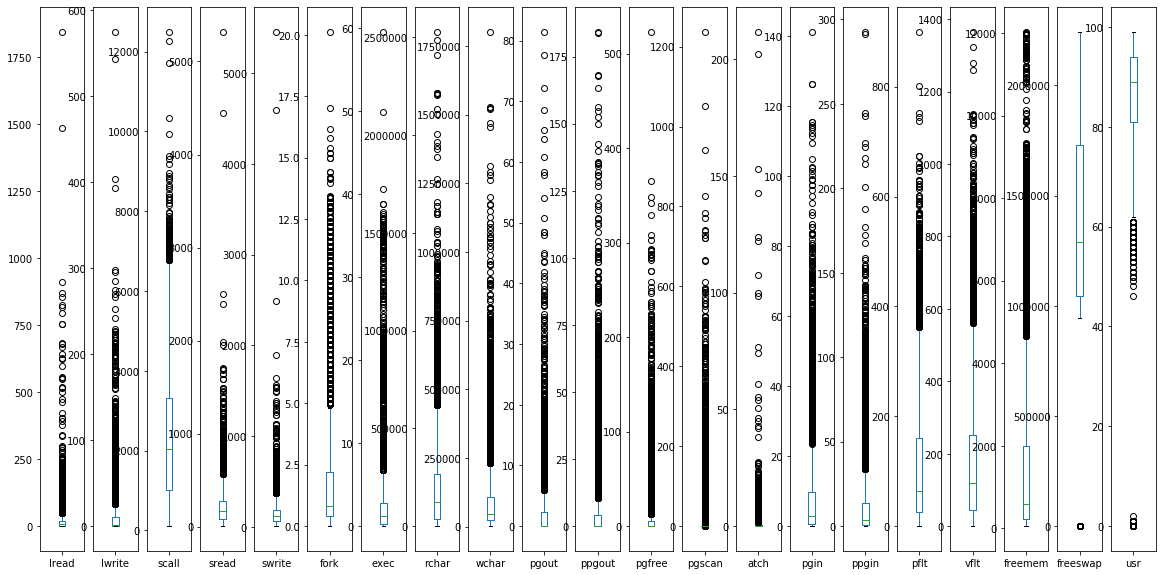

In [33]:
DF.plot(kind='box',subplots=True,figsize=(20,10))

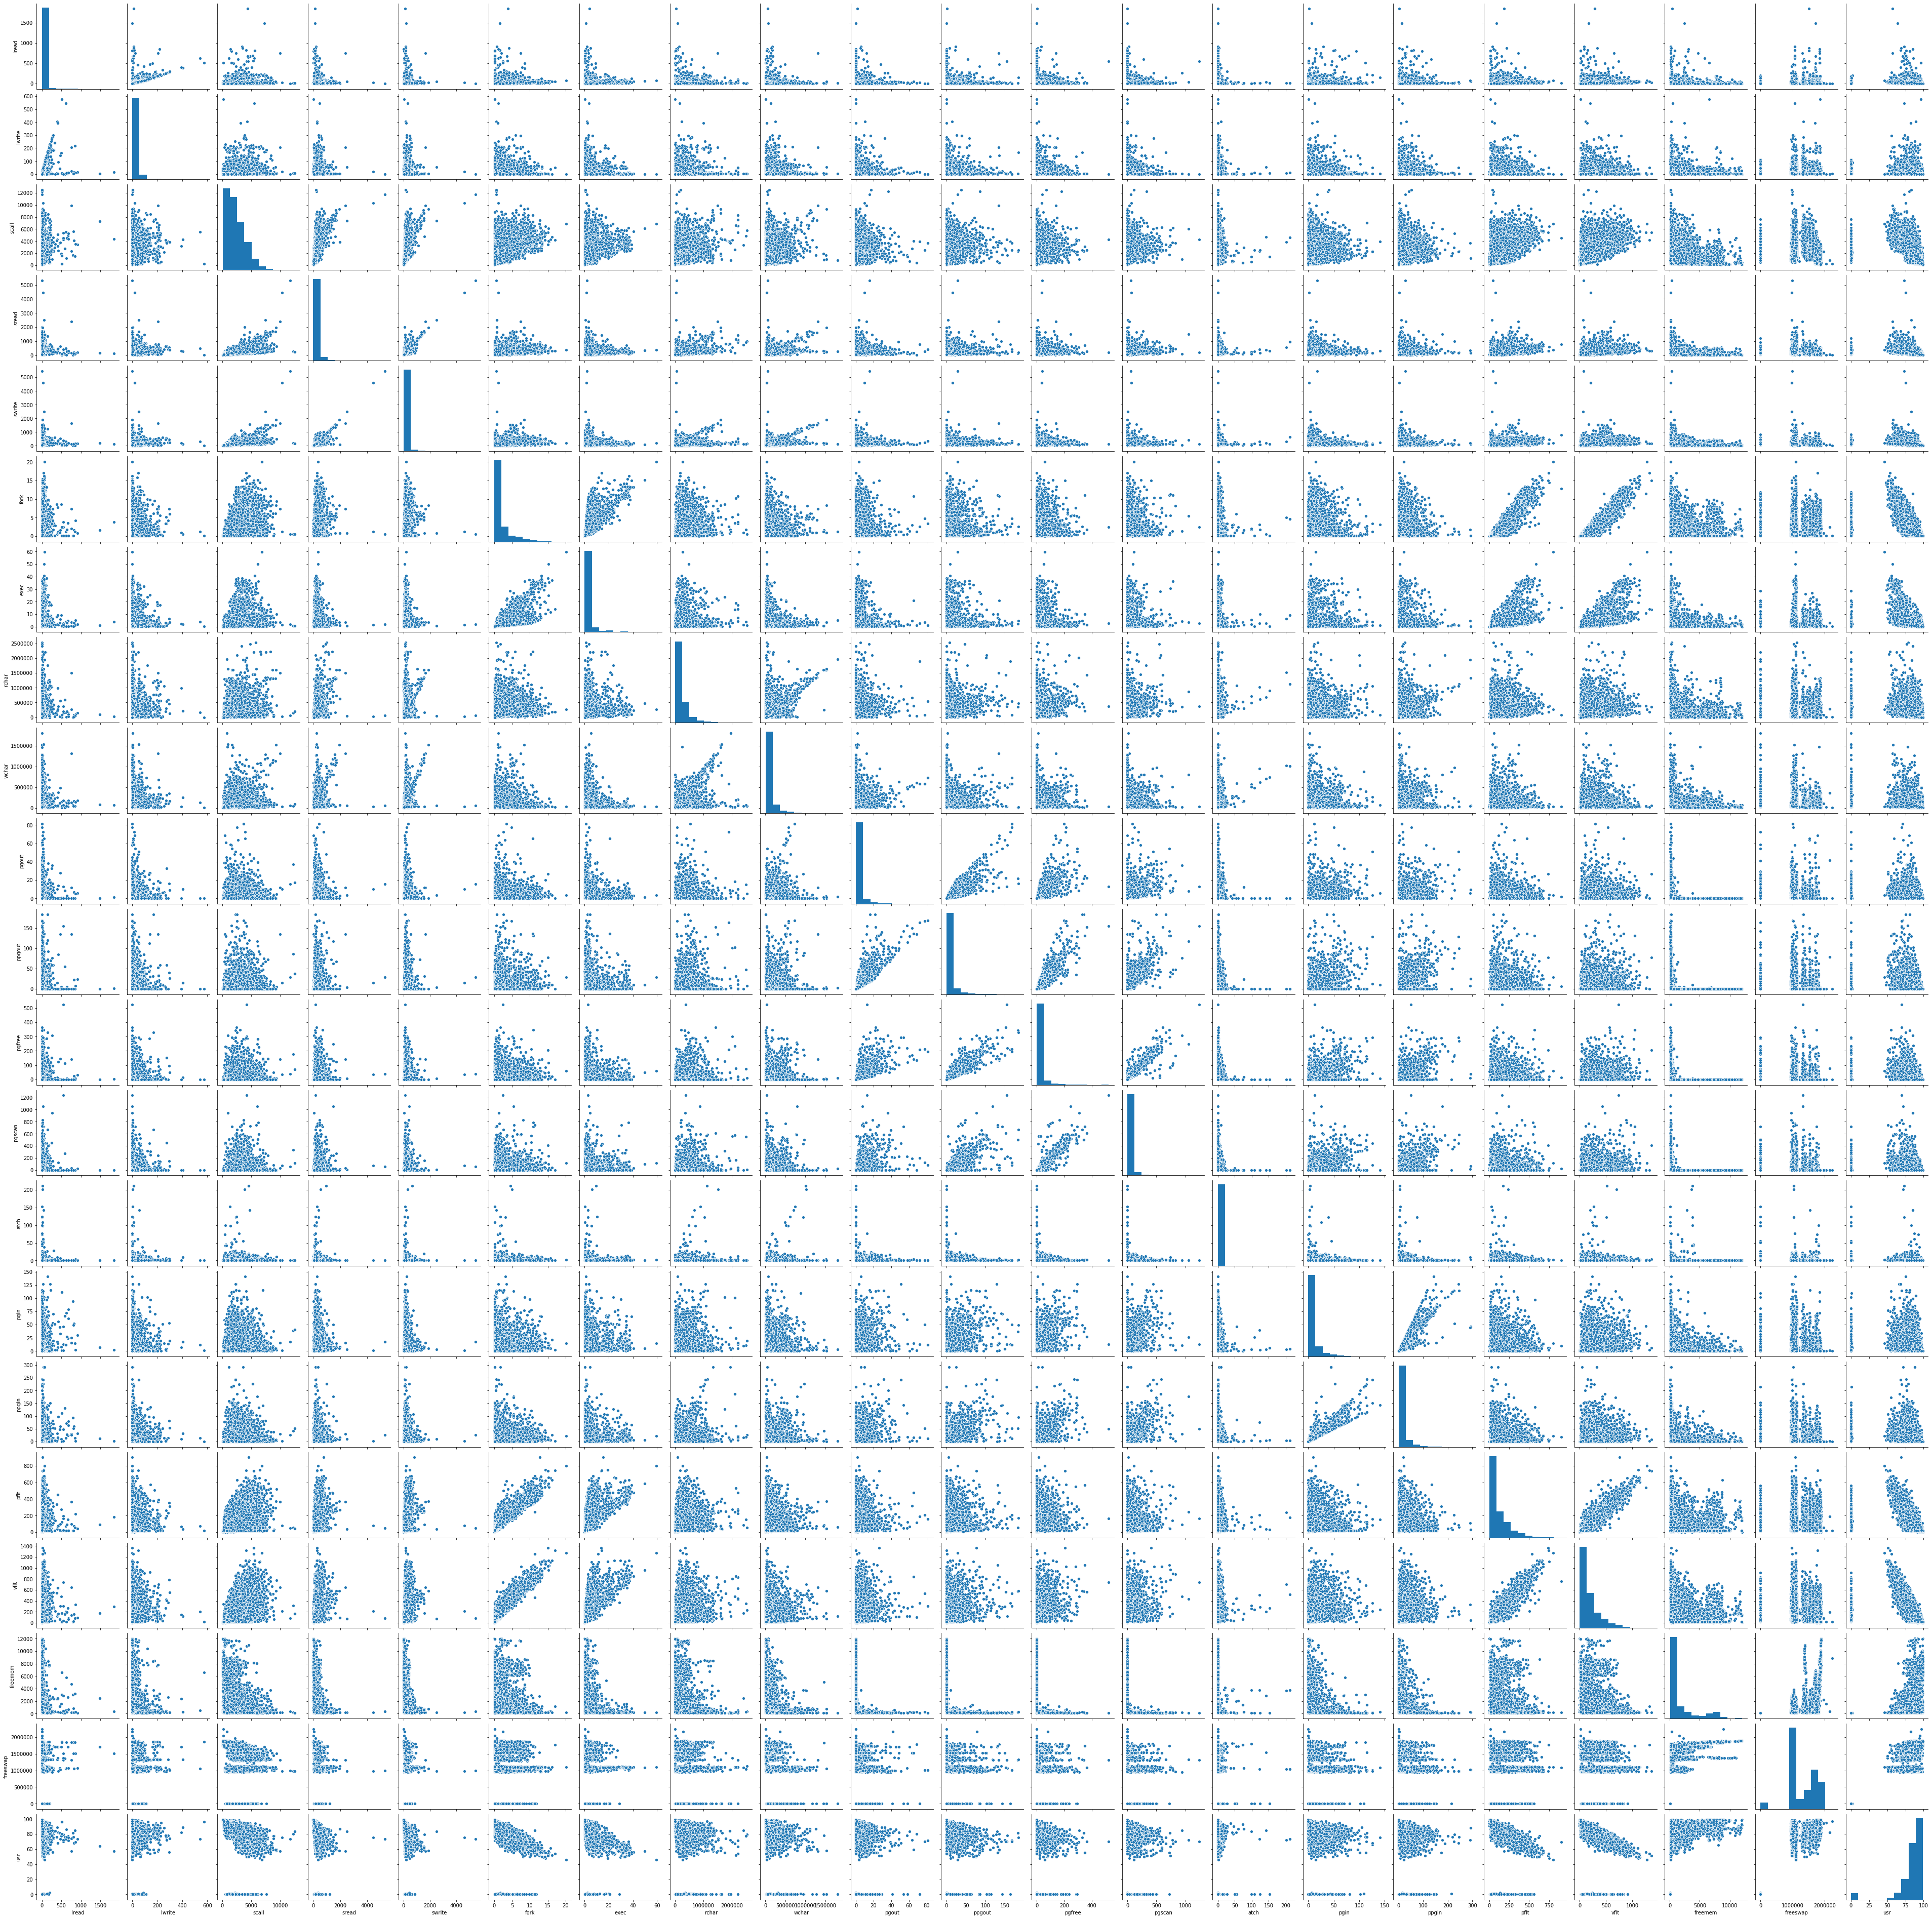

In [30]:
sns.pairplot(DF) 
plt.show()

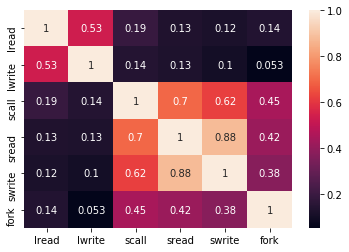

In [8]:
sns.heatmap(DF.iloc[:, 0:6].corr(),annot=True)

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [23]:
(DF == 0).all()

lread       False
lwrite      False
scall       False
sread       False
swrite      False
fork        False
exec        False
rchar       False
wchar       False
pgout       False
ppgout      False
pgfree      False
pgscan      False
atch        False
pgin        False
ppgin       False
pflt        False
vflt        False
runqsz      False
freemem     False
freeswap    False
usr         False
dtype: bool

In [24]:
DF.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

In [25]:
from sklearn.impute import SimpleImputer

In [26]:
SI = SimpleImputer(strategy='most_frequent')

In [27]:
impute_df = pd.DataFrame(SI.fit_transform(DF),columns=DF.columns)

In [28]:
impute_df.head()

lread lwrite scall sread swrite fork exec  rchar  wchar pgout  ... pgscan  \
0     1      0  2147    79     68  0.2  0.2  40671  53995     0  ...      0   
1     0      0   170    18     21  0.2  0.2    448   8385     0  ...      0   
2    15      3  2162   159    119    2  2.4    452  31950     0  ...      0   
3     0      0   160    12     16  0.2  0.2    452   8670     0  ...      0   
4     5      1   330    39     38  0.4  0.4    452  12185     0  ...      0   

  atch pgin ppgin   pflt   vflt         runqsz freemem     freeswap usr  
0    0  1.6   2.6     16   26.4      CPU_Bound  7567.7  1.73095e+06  95  
1    0    0     0  15.63  16.83  Not_CPU_Bound  7567.7    1.869e+06  97  
2  1.2    6   9.4  150.2  220.2  Not_CPU_Bound     702  1.02124e+06  87  
3    0  0.2   0.2   15.6   16.8  Not_CPU_Bound  7567.7   1.8637e+06  98  
4    0    1   1.2   37.8   47.6  Not_CPU_Bound     633  1.76025e+06  90  

[5 rows x 22 columns]

In [29]:
impute_df.isnull().sum()

lread       0
lwrite      0
scall       0
sread       0
swrite      0
fork        0
exec        0
rchar       0
wchar       0
pgout       0
ppgout      0
pgfree      0
pgscan      0
atch        0
pgin        0
ppgin       0
pflt        0
vflt        0
runqsz      0
freemem     0
freeswap    0
usr         0
dtype: int64

In [30]:
impute_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lread     8192 non-null   object
 1   lwrite    8192 non-null   object
 2   scall     8192 non-null   object
 3   sread     8192 non-null   object
 4   swrite    8192 non-null   object
 5   fork      8192 non-null   object
 6   exec      8192 non-null   object
 7   rchar     8192 non-null   object
 8   wchar     8192 non-null   object
 9   pgout     8192 non-null   object
 10  ppgout    8192 non-null   object
 11  pgfree    8192 non-null   object
 12  pgscan    8192 non-null   object
 13  atch      8192 non-null   object
 14  pgin      8192 non-null   object
 15  ppgin     8192 non-null   object
 16  pflt      8192 non-null   object
 17  vflt      8192 non-null   object
 18  runqsz    8192 non-null   object
 19  freemem   8192 non-null   object
 20  freeswap  8192 non-null   object
 21  usr       8192

In [31]:
DF.describe()

lread       lwrite        scall        sread       swrite  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     15.353149    13.188843  2275.904932   198.302979   139.447357   
std      19.906684    23.476119  1548.314358   143.183957   100.748445   
min       0.000000     0.000000   109.000000     6.000000     7.000000   
25%       2.000000     0.000000  1012.000000    86.000000    63.000000   
50%       7.000000     1.000000  2051.500000   166.000000   117.000000   
75%      20.000000    10.000000  3317.250000   279.000000   185.000000   
max      68.000000    66.000000  6768.000000   568.000000   392.450000   

              fork         exec         rchar         wchar        pgout  ...  \
count  8192.000000  8192.000000  8.088000e+03  8.177000e+03  8192.000000  ...   
mean      1.845552     2.355225  1.973857e+05  9.590299e+04     2.074583  ...   
std       2.256676     3.169813  2.398375e+05  1.408417e+05     3.734222  ...   
min       0.000000     0.000000  2.780000e+02  1.498000e+03     0.000000  ...   
25%       0.400000     0.200000  3.409150e+04  2.291600e+04     0.000000  ...   
50%       0.800000     1.200000  1.254735e+05  4.661900e+04     0.000000  ...   
75%       2.200000     2.800000  2.678288e+05  1.061010e+05     2.400000  ...   
max       7.400000    11.589000  2.526649e+06  1.801623e+06    11.420000  ...   

            pgfree       pgscan         atch         pgin        ppgin  \
count  8192.000000  8192.000000  8192.000000  8192.000000  8192.000000   
mean     14.134246    28.918743     0.904819     7.571747    11.162871   
std      27.264212    55.609014     1.734013    10.625813    16.131988   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.600000     0.600000   
50%       0.000000     0.000000     0.000000     2.800000     3.800000   
75%       5.000000     0.000000     0.600000     9.765000    13.800000   
max      70.290000   135.838500     5.000000    35.831500    53.780000   

              pflt         vflt      freemem      freeswap          usr  
count  8192.000000  8192.000000  8192.000000  8.192000e+03  8192.000000  
mean    105.431145   177.577158  1808.359558  1.362932e+06    83.968872  
std     101.035174   167.255745  2525.575412  3.437801e+05    18.401905  
min       0.000000     0.200000    55.000000  9.426000e+05     0.000000  
25%      25.000000    45.400000   231.000000  1.042624e+06    81.000000  
50%      63.800000   120.400000   579.000000  1.289290e+06    89.000000  
75%     159.600000   251.800000  2002.250000  1.730380e+06    94.000000  
max     361.280000   594.484500  7567.700000  2.243187e+06    99.000000  

[8 rows x 21 columns]

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [38]:
encodercolor= ce.OrdinalEncoder(cols=['color'],return_df=True,
                           mapping=[{'col':'color','mapping':{'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1}}])  

df=encodercolor.fit_transform(df)
df.head()

NameError: name 'ce' is not defined

In [42]:
DF.describe().T

count          mean            std       min        25%        50%  \
lread     8192.0  1.535315e+01      19.906684       0.0        2.0        7.0   
lwrite    8192.0  1.318884e+01      23.476119       0.0        0.0        1.0   
scall     8192.0  2.275905e+03    1548.314358     109.0     1012.0     2051.5   
sread     8192.0  1.983030e+02     143.183957       6.0       86.0      166.0   
swrite    8192.0  1.394474e+02     100.748445       7.0       63.0      117.0   
fork      8192.0  1.845552e+00       2.256676       0.0        0.4        0.8   
exec      8192.0  2.355225e+00       3.169813       0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526     278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911    1498.0    22916.0    46619.0   
pgout     8192.0  2.074583e+00       3.734222       0.0        0.0        0.0   
ppgout    8192.0  6.076866e+00      11.696273       0.0        0.0        0.0   
pgfree    8192.0  1.413425e+01      27.264212       0.0        0.0        0.0   
pgscan    8192.0  2.891874e+01      55.609014       0.0        0.0        0.0   
atch      8192.0  9.048193e-01       1.734013       0.0        0.0        0.0   
pgin      8192.0  7.571747e+00      10.625813       0.0        0.6        2.8   
ppgin     8192.0  1.116287e+01      16.131988       0.0        0.6        3.8   
pflt      8192.0  1.054311e+02     101.035174       0.0       25.0       63.8   
vflt      8192.0  1.775772e+02     167.255745       0.2       45.4      120.4   
freemem   8192.0  1.808360e+03    2525.575412      55.0      231.0      579.0   
freeswap  8192.0  1.362932e+06  343780.143354  942600.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905       0.0       81.0       89.0   

                  75%           max  
lread          20.000  6.800000e+01  
lwrite         10.000  6.600000e+01  
scall        3317.250  6.768000e+03  
sread         279.000  5.680000e+02  
swrite        185.000  3.924500e+02  
fork            2.200  7.400000e+00  
exec            2.800  1.158900e+01  
rchar      267828.750  2.526649e+06  
wchar      106101.000  1.801623e+06  
pgout           2.400  1.142000e+01  
ppgout          4.200  3.240450e+01  
pgfree          5.000  7.029000e+01  
pgscan          0.000  1.358385e+02  
atch            0.600  5.000000e+00  
pgin            9.765  3.583150e+01  
ppgin          13.800  5.378000e+01  
pflt          159.600  3.612800e+02  
vflt          251.800  5.944845e+02  
freemem      2002.250  7.567700e+03  
freeswap  1730379.500  2.243187e+06  
usr            94.000  9.900000e+01

In [46]:
X = DF.drop('lread', axis=1)

y = DF[['lread']]

print(X.head())
print(y.head())

   lwrite   scall  sread  swrite  fork  exec    rchar    wchar  pgout  ppgout  \
0     0.0  2147.0   79.0    68.0   0.2   0.2  40671.0  53995.0    0.0     0.0   
1     0.0   170.0   18.0    21.0   0.2   0.2    448.0   8385.0    0.0     0.0   
2     3.0  2162.0  159.0   119.0   2.0   2.4      NaN  31950.0    0.0     0.0   
3     0.0   160.0   12.0    16.0   0.2   0.2      NaN   8670.0    0.0     0.0   
4     1.0   330.0   39.0    38.0   0.4   0.4      NaN  12185.0    0.0     0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound  7567.7   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound  7567.7   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound   702.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound  7567.7   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound   633.0   

    freeswap  usr  
0  1730946.0   95  
1  1869002.0   9

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      lwrite   scall  sread  swrite  fork  exec     rchar     wchar  pgout  \
694      1.0  1345.0  223.0   192.0   0.6   0.6  198703.0  293578.0   0.60   
5535     1.0  1429.0   87.0    67.0   0.2   0.2    7163.0   24842.0   0.00   
4244    66.0  3273.0  225.0   180.0   0.6   0.4   83246.0   53705.0   5.39   
2472     8.0  4349.0  300.0   191.0   2.8   3.0   96009.0   70467.0   0.00   
7052    23.0   225.0   13.0    13.0   0.4   1.6   17132.0   12514.0   0.00   

      ppgout  ...    pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  \
694     6.20  ...  135.8385   5.0  3.80   7.40   28.20   56.60      CPU_Bound   
5535    0.00  ...    0.0000   0.0  1.60   1.60   15.77   30.74  Not_CPU_Bound   
4244    7.19  ...    0.0000   5.0  3.99   4.59   59.88   74.05      CPU_Bound   
2472    0.00  ...    0.0000   0.0  2.80   3.20  129.00  236.80      CPU_Bound   
7052    0.00  ...    0.0000   0.0  0.00   0.00   19.80   23.80  Not_CPU_Bound   

     freemem    freeswap  usr  
694    121.0

In [61]:
X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

In [59]:
regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

NameError: name 'X_train_scaled' is not defined

In [53]:
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

NameError: name 'X_train_scaled' is not defined

# Problem 2: Logistic Regression and LDA

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.


In [10]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.style
import scipy.stats as stats
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
df = pd.read_excel('Contraceptive_method_dataset.xlsx')

In [70]:
df.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Standard_of_living_index  \
0   Scientology           No                   2                     High   
1   Scientology           No                   3                Very High   
2   Scientology           No                   3                Very High   
3   Scientology           No                   3                     High   
4   Scientology           No                   3                      Low   

  Media_exposure  Contraceptive_method_used  
0         Exposed                        No  
1         Exposed                        No  
2         Exposed                        No  
3         Exposed                        No  
4         Exposed                        No

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_age                   1402 non-null   float64
 1   Wife_ education            1473 non-null   object 
 2   Husband_education          1473 non-null   object 
 3   No_of_children_born        1452 non-null   float64
 4   Wife_religion              1473 non-null   object 
 5   Wife_Working               1473 non-null   object 
 6   Husband_Occupation         1473 non-null   int64  
 7   Standard_of_living_index   1473 non-null   object 
 8   Media_exposure             1473 non-null   object 
 9   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 115.2+ KB


In [72]:
df.describe()

Wife_age  No_of_children_born  Husband_Occupation
count  1402.000000          1452.000000         1473.000000
mean     32.606277             3.254132            2.137814
std       8.274927             2.365212            0.864857
min      16.000000             0.000000            1.000000
25%      26.000000             1.000000            1.000000
50%      32.000000             3.000000            2.000000
75%      39.000000             4.000000            3.000000
max      49.000000            16.000000            4.000000

In [73]:
df.isna().sum()

Wife_age                     71
Wife_ education               0
Husband_education             0
No_of_children_born          21
Wife_religion                 0
Wife_Working                  0
Husband_Occupation            0
Standard_of_living_index      0
Media_exposure                0
Contraceptive_method_used     0
dtype: int64

In [76]:
# Check for duplicate data

dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 80


In [79]:
df.drop('Wife_age', axis=1, inplace=True)
df.head()

Wife_ education Husband_education  No_of_children_born Wife_religion  \
0         Primary         Secondary                  3.0   Scientology   
1      Uneducated         Secondary                 10.0   Scientology   
2         Primary         Secondary                  7.0   Scientology   
3       Secondary           Primary                  9.0   Scientology   
4       Secondary         Secondary                  8.0   Scientology   

  Wife_Working  Husband_Occupation Standard_of_living_index Media_exposure   \
0           No                   2                     High         Exposed   
1           No                   3                Very High         Exposed   
2           No                   3                Very High         Exposed   
3           No                   3                     High         Exposed   
4           No                   3                      Low         Exposed   

  Contraceptive_method_used  
0                        No  
1                        No  
2                        No  
3                        No  
4                        No

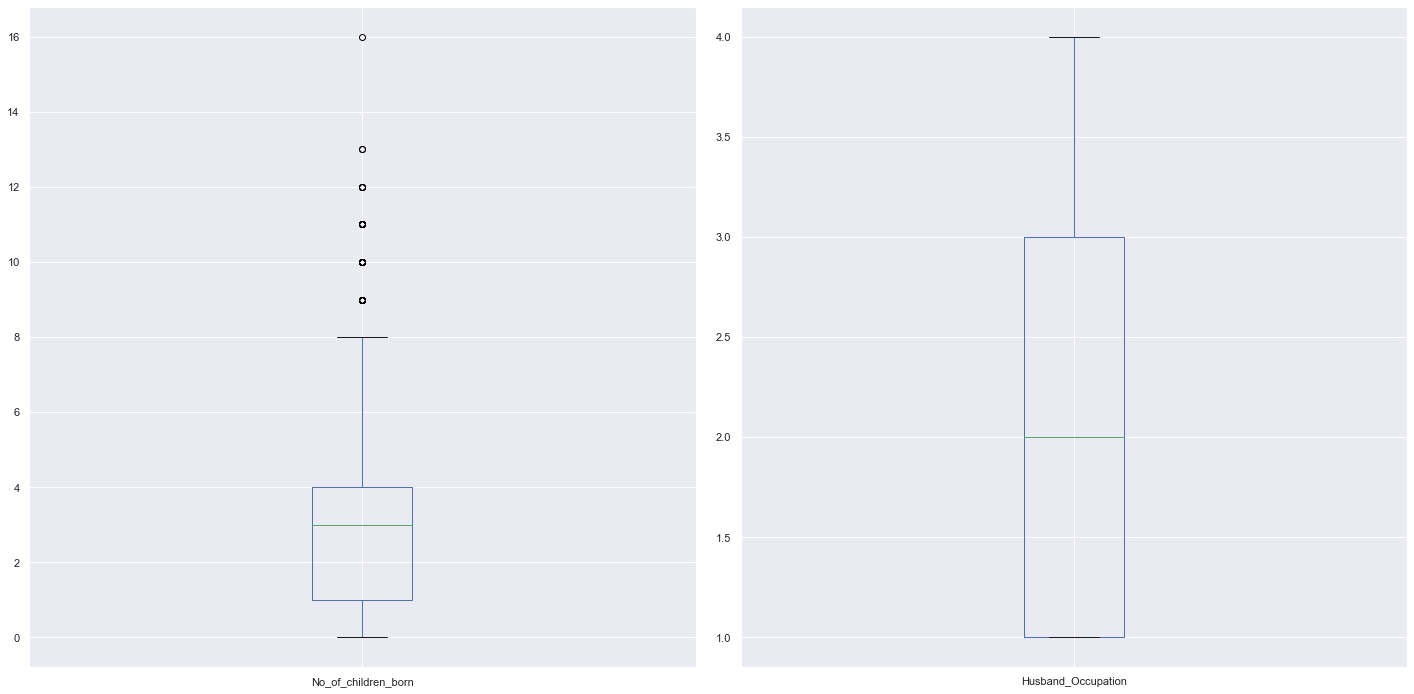

In [80]:
df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [82]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

numeric_cols

Index(['No_of_children_born', 'Husband_Occupation'], dtype='object')

In [92]:
from scipy import stats

z=np.abs(stats.zscore(df['No_of_children_born']))

listin= np.where(z>3)




outlier = list((int(j) for i in listin for j in i)) 
print("the number of outliers are ", len(outlier) )

the number of outliers are  0


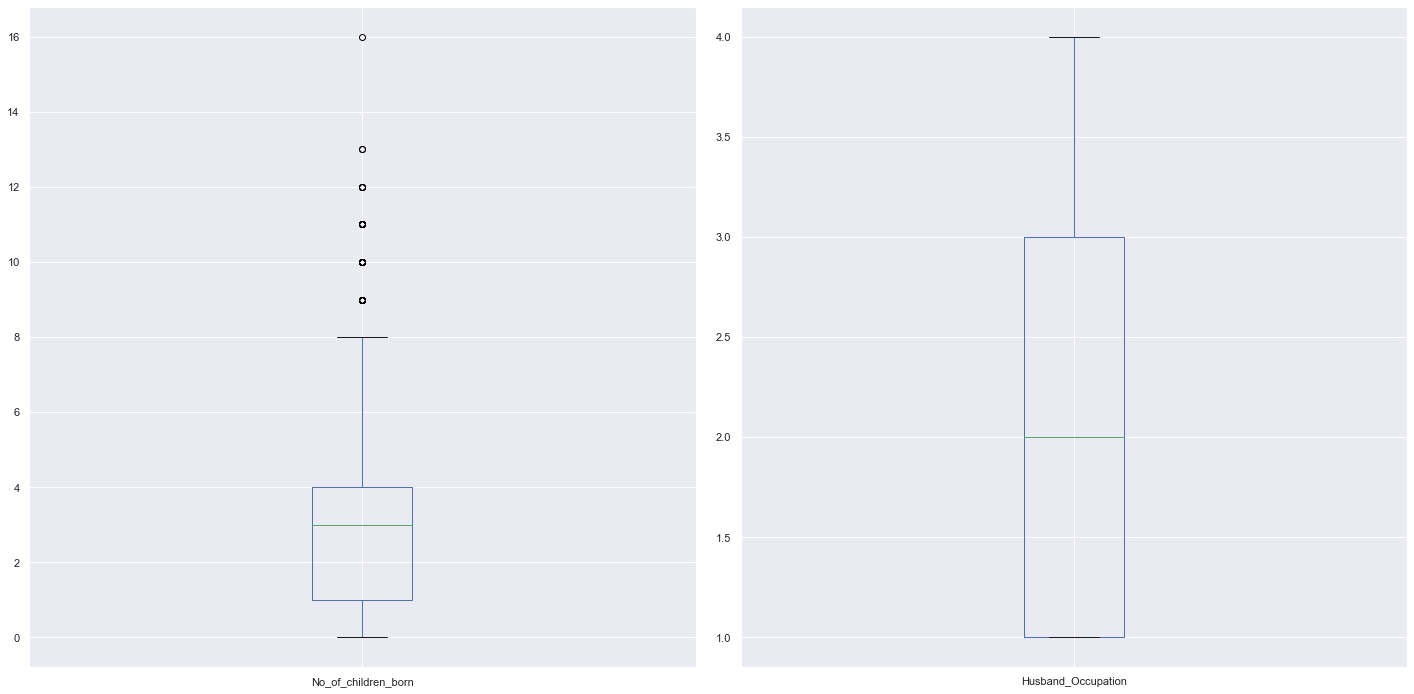

In [95]:
df.plot(kind='box',subplots=True,figsize=(20,10))
plt.tight_layout(pad=2.0)

In [96]:
print('Wife_ education')
df['Husband_education'].value_counts()


Wife_ education


Tertiary      899
Secondary     352
Primary       178
Uneducated     44
Name: Husband_education, dtype: int64

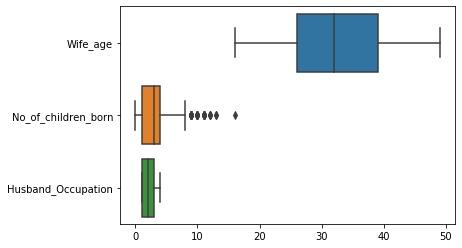

In [34]:
# Check for outliers
sns.boxplot(data=df, orient='h')

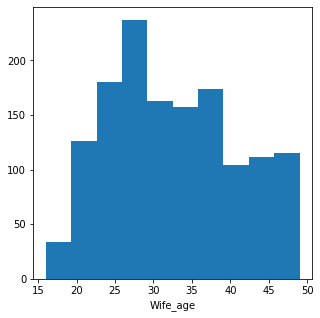

In [35]:
 plt.figure(figsize=(5,5))
plt.hist(df['Wife_age'])
plt.xlabel('Wife_age')
plt.show()

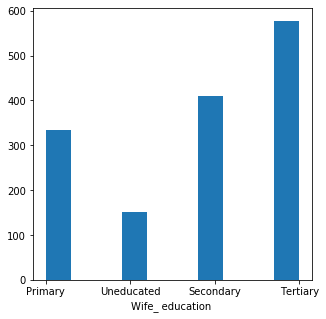

In [36]:
 plt.figure(figsize=(5,5))
plt.hist(df['Wife_ education'])
plt.xlabel('Wife_ education ')
plt.show()

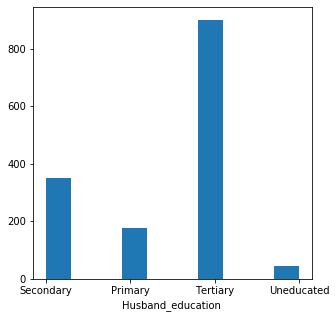

In [37]:
 plt.figure(figsize=(5,5))
plt.hist(df['Husband_education'])
plt.xlabel('Husband_education ')
plt.show()

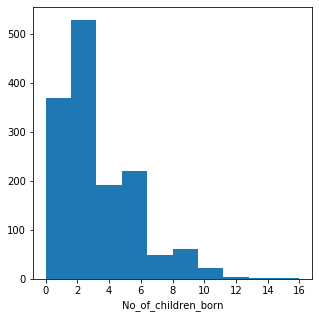

In [38]:
plt.figure(figsize=(5,5))
plt.hist(df['No_of_children_born'])
plt.xlabel('No_of_children_born')
plt.show()

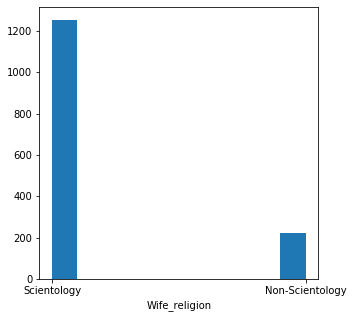

In [39]:
plt.figure(figsize=(5,5))
plt.hist(df['Wife_religion'])
plt.xlabel('Wife_religion')
plt.show()

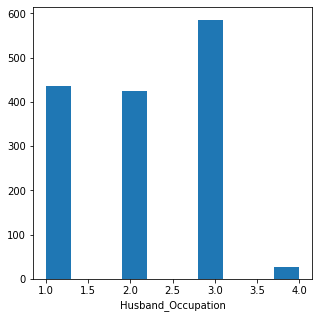

In [40]:
plt.figure(figsize=(5,5))
plt.hist(df['Husband_Occupation'])
plt.xlabel('Husband_Occupation')
plt.show()

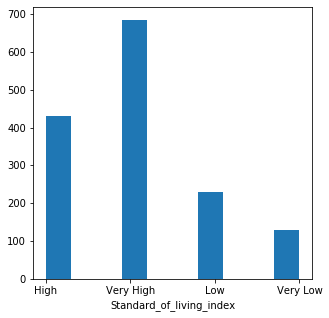

In [41]:
plt.figure(figsize=(5,5))
plt.hist(df['Standard_of_living_index'])
plt.xlabel('Standard_of_living_index')
plt.show()

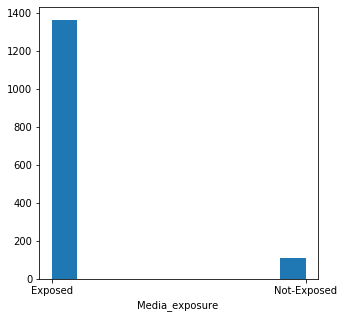

In [42]:
plt.figure(figsize=(5,5))
plt.hist(df['Media_exposure '])
plt.xlabel('Media_exposure ')
plt.show()

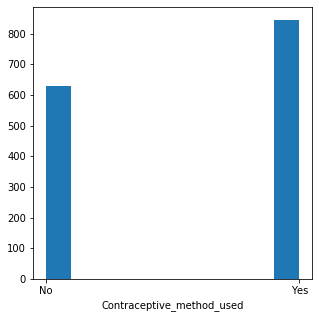

In [43]:
plt.figure(figsize=(5,5))
plt.hist(df['Contraceptive_method_used'])
plt.xlabel('Contraceptive_method_used')
plt.show()

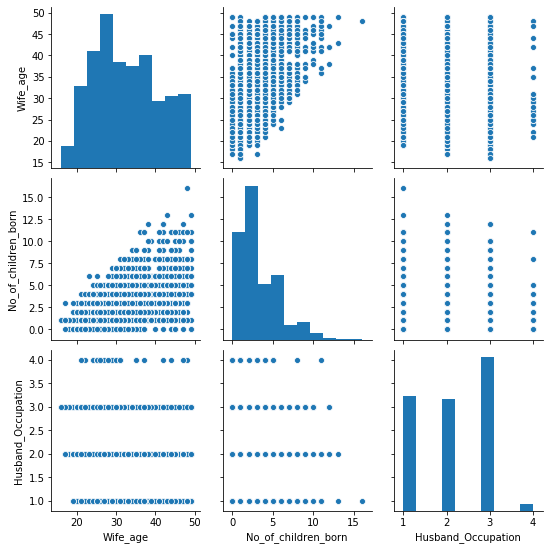

In [44]:
 sns.pairplot(df) 
plt.show()

### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [107]:
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='yes', '1', df['Standard_of_living_index'])
df['Standard_of_living_index']=np.where(df['Standard_of_living_index'] =='no', '0', df['Standard_of_living_index'])

In [108]:
df.head()

Wife_ education Husband_education  No_of_children_born Wife_religion  \
0         Primary         Secondary                  3.0   Scientology   
1      Uneducated         Secondary                 10.0   Scientology   
2         Primary         Secondary                  7.0   Scientology   
3       Secondary           Primary                  9.0   Scientology   
4       Secondary         Secondary                  8.0   Scientology   

  Wife_Working  Husband_Occupation Standard_of_living_index Media_exposure   \
0           No                   2                     High         Exposed   
1           No                   3                Very High         Exposed   
2           No                   3                Very High         Exposed   
3           No                   3                     High         Exposed   
4           No                   3                      Low         Exposed   

  Contraceptive_method_used  
0                        No  
1                        No  
2                        No  
3                        No  
4                        No

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1473 entries, 0 to 1472
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Wife_ education            1473 non-null   object 
 1   Husband_education          1473 non-null   object 
 2   No_of_children_born        1452 non-null   float64
 3   Wife_religion              1473 non-null   object 
 4   Wife_Working               1473 non-null   object 
 5   Husband_Occupation         1473 non-null   int64  
 6   Standard_of_living_index   1473 non-null   object 
 7   Media_exposure             1473 non-null   object 
 8   Contraceptive_method_used  1473 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 103.7+ KB


In [12]:
# Copy all the predictor variables into X dataframe
X = df.drop('Standard_of_living_index', axis=1)

# Copy target into the y dataframe. 
y = df[['Standard_of_living_index']]

In [14]:
X.head()

Wife_age Wife_ education Husband_education  No_of_children_born  \
0      24.0         Primary         Secondary                  3.0   
1      45.0      Uneducated         Secondary                 10.0   
2      43.0         Primary         Secondary                  7.0   
3      42.0       Secondary           Primary                  9.0   
4      36.0       Secondary         Secondary                  8.0   

  Wife_religion Wife_Working  Husband_Occupation Media_exposure   \
0   Scientology           No                   2         Exposed   
1   Scientology           No                   3         Exposed   
2   Scientology           No                   3         Exposed   
3   Scientology           No                   3         Exposed   
4   Scientology           No                   3         Exposed   

  Contraceptive_method_used  
0                        No  
1                        No  
2                        No  
3                        No  
4                        No

In [15]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

In [16]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# Let us explore the coefficients for each of the independent attributes


### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.